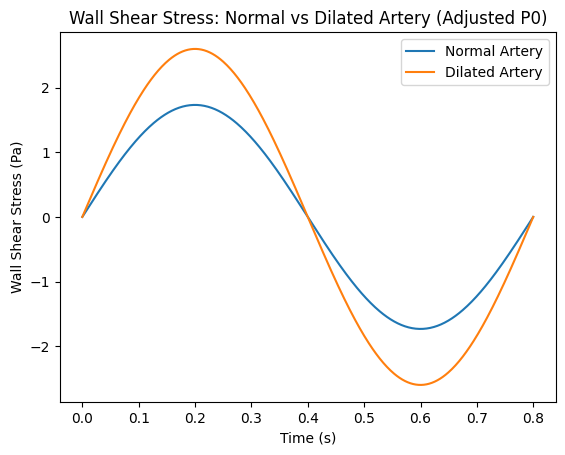

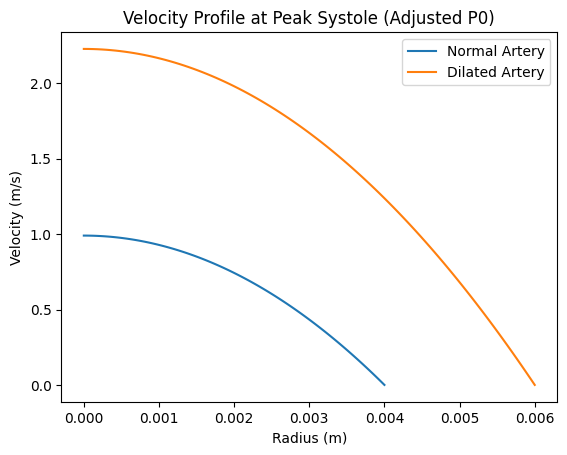

Adjusted P0 (Pa/m): 866.745283018868
Reynolds Number (Normal): 1595.951688623458
Reynolds Number (Dilated): 5386.336949104172
OSI (Normal): 0.5
OSI (Dilated): 0.5


/tmp/ipython-input-4178397774.py:89: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  OSI_normal = 0.5 * (1 - (abs(np.trapz(tau_normal, t)) / np.trapz(abs(tau_normal), t)))
/tmp/ipython-input-4178397774.py:90: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  OSI_dilated = 0.5 * (1 - (abs(np.trapz(tau_dilated, t)) / np.trapz(abs(tau_dilated), t)))


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Physiological Parameters
# -------------------------------
mu = 0.0035          # Blood viscosity (Pa.s)
rho = 1060           # Blood density (kg/m^3)
R_normal = 0.004     # Normal artery radius (m)
R_dilated = 0.006    # Dilated artery radius (m)
f = 1.25             # Heartbeat frequency (Hz)
omega = 2 * np.pi * f

# Time array (1 cardiac cycle)
t = np.linspace(0, 1/f, 500)

# Radial positions
r_normal = np.linspace(0, R_normal, 100)
r_dilated = np.linspace(0, R_dilated, 100)

# -------------------------------
# Compute realistic P0 for normal artery
# -------------------------------

# Desired Reynolds number
Re_target = 1200

# Mean velocity for parabolic profile: V_mean = (1/2) * V_max
# V_max = (-dPdx_peak * R^2) / (4*mu) → V_mean = (-dPdx_peak * R^2) / (8*mu)
# Solve for dPdx_peak using Re_target = rho * V_mean * 2*R / mu

V_mean_target = Re_target * mu / (rho * 2 * R_normal)
dPdx_peak = -8 * mu * V_mean_target / (R_normal**2)   # Peak pressure gradient (Pa/m)

# Pulsatile pressure gradient
P0 = abs(dPdx_peak)  # amplitude
dPdx = -P0 * np.sin(omega * t)

# -------------------------------
# Wall Shear Stress
# -------------------------------
tau_normal = (R_normal / 2) * (-dPdx)
tau_dilated = (R_dilated / 2) * (-dPdx)

plt.figure()
plt.plot(t, tau_normal)
plt.plot(t, tau_dilated)
plt.xlabel("Time (s)")
plt.ylabel("Wall Shear Stress (Pa)")
plt.title("Wall Shear Stress: Normal vs Dilated Artery (Adjusted P0)")
plt.legend(["Normal Artery", "Dilated Artery"])
plt.show()

# -------------------------------
# Velocity Profile at Peak Systole
# -------------------------------
peak_index = np.argmax(-dPdx)
dp_peak = dPdx[peak_index]

u_normal = (1/(4*mu)) * (-dp_peak) * (R_normal**2 - r_normal**2)
u_dilated = (1/(4*mu)) * (-dp_peak) * (R_dilated**2 - r_dilated**2)

plt.figure()
plt.plot(r_normal, u_normal)
plt.plot(r_dilated, u_dilated)
plt.xlabel("Radius (m)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity Profile at Peak Systole (Adjusted P0)")
plt.legend(["Normal Artery", "Dilated Artery"])
plt.show()

# -------------------------------
# Reynolds Number
# -------------------------------
V_mean_normal = np.mean(u_normal)
Re_normal = (rho * V_mean_normal * 2 * R_normal) / mu

V_mean_dilated = np.mean(u_dilated)
Re_dilated = (rho * V_mean_dilated * 2 * R_dilated) / mu

print("Adjusted P0 (Pa/m):", P0)
print("Reynolds Number (Normal):", Re_normal)
print("Reynolds Number (Dilated):", Re_dilated)

# -------------------------------
# Oscillatory Shear Index (OSI)
# -------------------------------
T = t[-1]
OSI_normal = 0.5 * (1 - (abs(np.trapz(tau_normal, t)) / np.trapz(abs(tau_normal), t)))
OSI_dilated = 0.5 * (1 - (abs(np.trapz(tau_dilated, t)) / np.trapz(abs(tau_dilated), t)))

print("OSI (Normal):", OSI_normal)
print("OSI (Dilated):", OSI_dilated)
